In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [ ]:
y.shape, tx.shape

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_cost` function below:

In [99]:


def compute_loss(y, tx, w, mse=True):

    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    e = y - tx@w
    if not mse:
        return 1/(y.shape[0]) * np.sum(np.abs(e))
    return 1/(2*y.shape[0]) * e@e

# 2. Grid Search

Fill in the function `grid_search()` below:

In [27]:
# from costs import *

def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.
        
    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """

    losses = np.zeros((len(grid_w0), len(grid_w1)))
    for i in range(losses.shape[0]):
        for j in range(losses.shape[1]):
            losses[i,j] = compute_loss(y, tx, np.array([grid_w0[i], grid_w1[j]]))
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=15.55870336860953, w0*=72.72727272727272, w1*=13.636363636363626, execution time=1.400 seconds


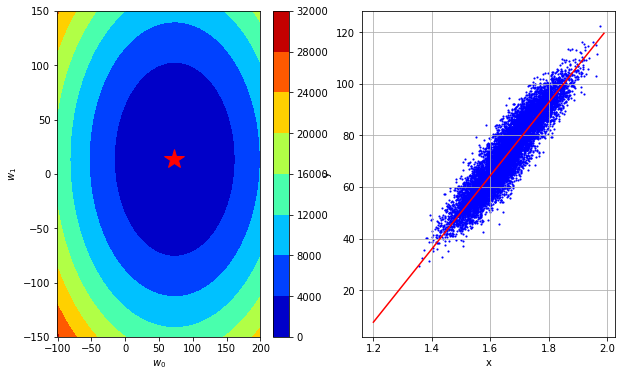

In [29]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [32]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    e = y - tx@w
    return -(1/y.shape[0]) * tx.T@e

print(compute_gradient(y, tx, np.array([100, 20])))
print(compute_gradient(y, tx, np.array([50, 10])))

[26.706078    6.52028757]
[-23.293922    -3.47971243]


Please fill in the functions `gradient_descent` below:

In [35]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of GD 
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):

        grad = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        
        w = w - gamma*grad
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [42]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.3

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2792.236712759167, w0=21.98817660063156, w1=4.0439137304966914
GD iter. 1/49: loss=1376.0427920650948, w0=37.37990022107365, w1=6.874653341844389
GD iter. 2/49: loss=682.1077709249996, w0=48.15410675538311, w1=8.856171069787777
GD iter. 3/49: loss=342.0796105663528, w0=55.69605132939974, w1=10.243233479348147
GD iter. 4/49: loss=175.46581199061586, w0=60.975412531211376, w1=11.214177166040413
GD iter. 5/49: loss=93.82505068850475, w0=64.67096537247951, w1=11.893837746725
GD iter. 6/49: loss=53.82107765047037, w0=67.25785236136721, w1=12.36960015320421
GD iter. 7/49: loss=34.219130861833506, w0=69.0686732535886, w1=12.70263383773966
GD iter. 8/49: loss=24.61417693540144, w0=70.33624787814358, w1=12.935757416914475
GD iter. 9/49: loss=19.90774951144969, w0=71.22355011533206, w1=13.098943922336847
GD iter. 10/49: loss=17.60160007371335, w0=71.844661681364, w1=13.213174476132506
GD iter. 11/49: loss=16.471586849222533, w0=72.27943977758636, w1=13.293135863789468
GD iter

In [43]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses, gd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4. Stochastic gradient descent

In [82]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from just few examples n and their corresponding y_n labels.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """
    e = y - tx@w
    return -(1/y.shape[0]) * tx.T@e


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).
            
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD 
    """
    
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):
        for y_batch, x_batch in batch_iter(y, tx, batch_size):
            grad = compute_stoch_gradient(y_batch, x_batch, w)
            w = w - gamma*grad
    
        loss = compute_loss(y, tx, w)
        losses.append(loss)
        ws.append(w)
        print("SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
            bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [83]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=2626.922186003054, w0=4.7006141253179035, w1=-9.280575585787922
SGD iter. 1/49: loss=2422.3516596243235, w0=9.244228997307761, w1=-13.195526448705976
SGD iter. 2/49: loss=2026.1617569989048, w0=15.681652988327045, w1=-13.022706272446174
SGD iter. 3/49: loss=1728.9860817578833, w0=21.798346592856046, w1=-14.366402214068296
SGD iter. 4/49: loss=996.3002833451212, w0=31.03754172281211, w1=0.2046562526463216
SGD iter. 5/49: loss=931.1133966683353, w0=33.89693978952637, w1=-3.2335400952864912
SGD iter. 6/49: loss=804.2666651054492, w0=38.151487511592535, w1=-5.034359309315807
SGD iter. 7/49: loss=474.2109136947638, w0=44.63068585365539, w1=3.6782357528727037
SGD iter. 8/49: loss=303.00374594466143, w0=49.31316808689587, w1=13.080766561671645
SGD iter. 9/49: loss=237.74659965840326, w0=52.25092795648826, w1=12.096301731228843
SGD iter. 10/49: loss=179.79268551125142, w0=55.16953945973275, w1=12.913715312567662
SGD iter. 11/49: loss=145.24398682302646, w0=57.1835513950278

In [84]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5. Effect of Outliers and MAE Cost Function

In [94]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [95]:
y.shape, tx.shape

((202,), (202, 2))

In [96]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start the grid search
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)

# Start gradient descent.
start_time = datetime.datetime.now()

gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2869.835114535854, w0=51.84746409844846, w1=7.724426406192428
GD iter. 1/49: loss=318.2821247015954, w0=67.40170332798299, w1=10.041754328050121
GD iter. 2/49: loss=88.6423556165127, w0=72.06797509684336, w1=10.736952704607413
GD iter. 3/49: loss=67.97477639885521, w0=73.46785662750146, w1=10.945512217574597
GD iter. 4/49: loss=66.11469426926604, w0=73.88782108669889, w1=11.00808007146475
GD iter. 5/49: loss=65.94728687760302, w0=74.01381042445813, w1=11.026850427631794
GD iter. 6/49: loss=65.93222021235334, w0=74.0516072257859, w1=11.03248153448191
GD iter. 7/49: loss=65.93086421248087, w0=74.06294626618423, w1=11.034170866536943
GD iter. 8/49: loss=65.93074217249234, w0=74.06634797830372, w1=11.034677666153454
GD iter. 9/49: loss=65.93073118889338, w0=74.06736849193958, w1=11.034829706038408
GD iter. 10/49: loss=65.93073020036948, w0=74.06767464603033, w1=11.034875318003893
GD iter. 11/49: loss=65.93073011140233, w0=74.06776649225755, w1=11.03488900159354
GD iter.

In [97]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses, gd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6. Subgradient descent

In [107]:
def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    e = y - tx@w
    return -(1/y.shape[0]) * tx.T@np.sign(e)

In [108]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD 
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        grad = compute_subgradient_mae(y, tx, w)
        loss = compute_loss(y, tx, w, mse=False)
        
        w = w - gamma*grad
        
        ws.append(w)
        losses.append(loss)
        print("SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [109]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(
    y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/499: loss=74.06780585492638, w0=0.7000000000000004, w1=7.625844400394043e-16
SubGD iter. 1/499: loss=73.36780585492637, w0=1.4000000000000008, w1=1.5251688800788087e-15
SubGD iter. 2/499: loss=72.66780585492637, w0=2.1000000000000014, w1=2.287753320118213e-15
SubGD iter. 3/499: loss=71.96780585492637, w0=2.8000000000000016, w1=3.0503377601576174e-15
SubGD iter. 4/499: loss=71.26780585492638, w0=3.5000000000000018, w1=3.812922200197022e-15
SubGD iter. 5/499: loss=70.56780585492639, w0=4.200000000000002, w1=4.575506640236426e-15
SubGD iter. 6/499: loss=69.86780585492637, w0=4.900000000000002, w1=5.3380910802758305e-15
SubGD iter. 7/499: loss=69.16780585492637, w0=5.600000000000002, w1=6.100675520315235e-15
SubGD iter. 8/499: loss=68.46780585492637, w0=6.3000000000000025, w1=6.863259960354639e-15
SubGD iter. 9/499: loss=67.76780585492638, w0=7.000000000000003, w1=7.625844400394044e-15
SubGD iter. 10/499: loss=67.06780585492638, w0=7.700000000000003, w1=8.388428840433449e-15


In [110]:
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses, subgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [111]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic SubGradient Descent algorithm (SubSGD).
            
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD 
    """
    
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):

        for y_batch, x_batch in batch_iter(y, tx, batch_size):
            grad = compute_subgradient_mae(y_batch, x_batch, w)
            w = w - gamma*grad
    
        loss = compute_loss(y, tx, w, mse=False)
        losses.append(loss)
        ws.append(w)
        
        print("SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [112]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SubSGD iter. 0/499: loss=73.36780585492637, w0=0.7, w1=-0.5355196828262054
SubSGD iter. 1/499: loss=72.66780585492639, w0=1.4, w1=-0.2653812325365354
SubSGD iter. 2/499: loss=71.96780585492638, w0=2.0999999999999996, w1=-0.9994955555375244
SubSGD iter. 3/499: loss=71.26780585492638, w0=2.8, w1=-0.34743865809506913
SubSGD iter. 4/499: loss=70.56780585492638, w0=3.5, w1=-0.1510940645778411
SubSGD iter. 5/499: loss=69.86780585492637, w0=4.2, w1=-0.5470703077996735
SubSGD iter. 6/499: loss=69.16780585492639, w0=4.9, w1=-0.2815866055754432
SubSGD iter. 7/499: loss=68.46780585492637, w0=5.6000000000000005, w1=0.3815577114676045
SubSGD iter. 8/499: loss=67.76780585492638, w0=6.300000000000001, w1=1.2377797639721426
SubSGD iter. 9/499: loss=67.06780585492639, w0=7.000000000000001, w1=0.3489479398056492
SubSGD iter. 10/499: loss=66.36780585492637, w0=7.700000000000001, w1=-0.0009899916746680115
SubSGD iter. 11/499: loss=65.66780585492639, w0=8.4, w1=-0.5256229163864075
SubSGD iter. 12/499: loss

In [113]:
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses, subsgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>